
##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.









In [1]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

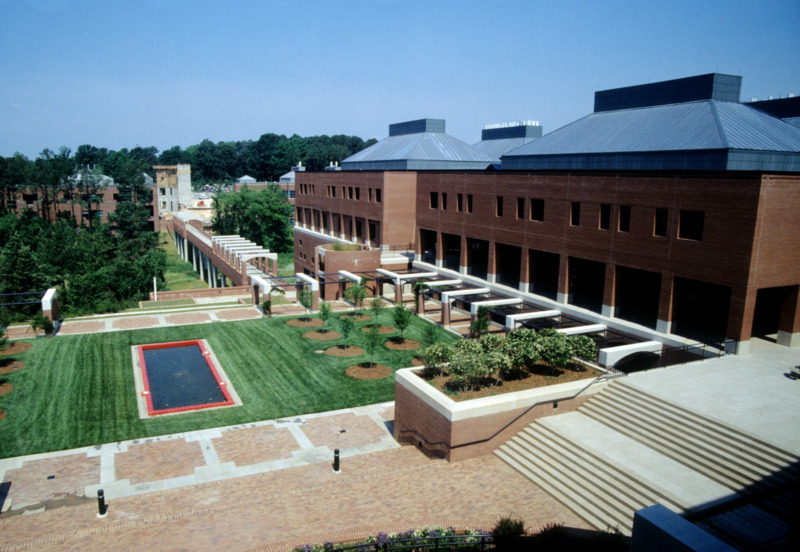

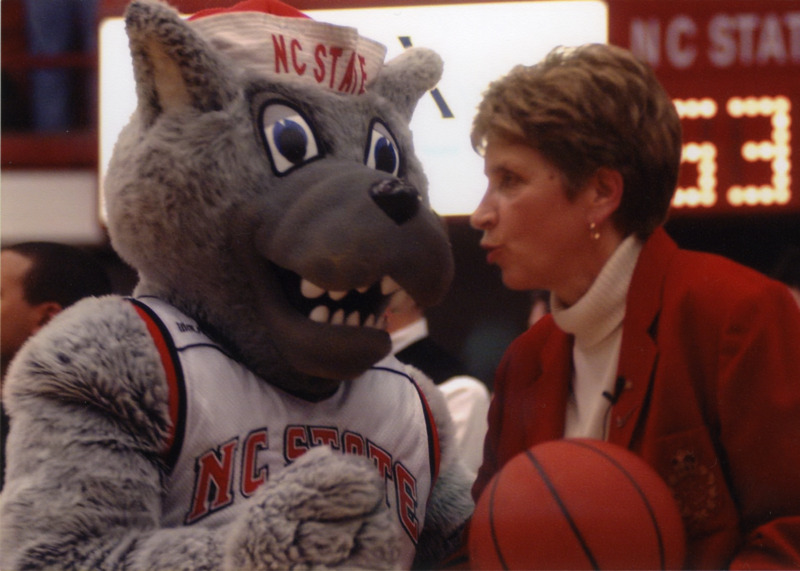

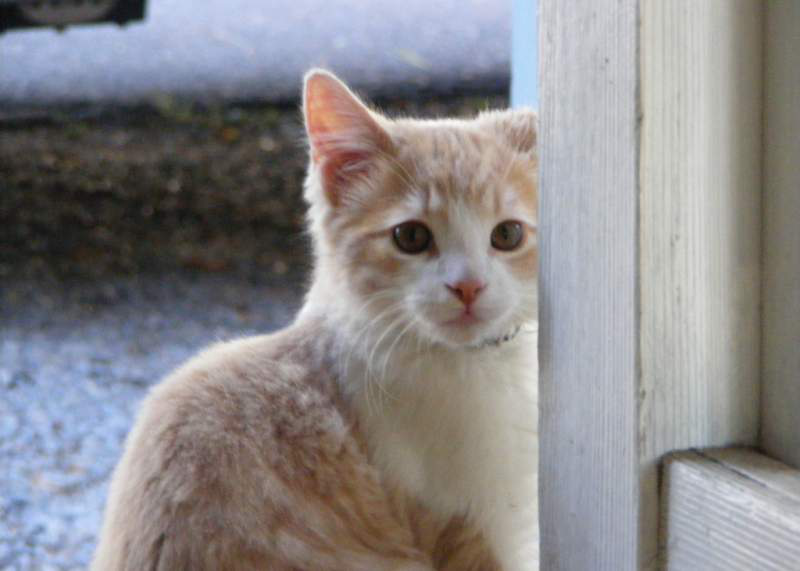

In [2]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 

  # Check more https://note.nkmk.me/en/python-opencv-bgr-rgb-cvtcolor/
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  ## this is to plot the image
  cv2_imshow(image)
  print('\n')




In [3]:
## This is to access the google drive and read the images stored at google drive
## you must login a google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


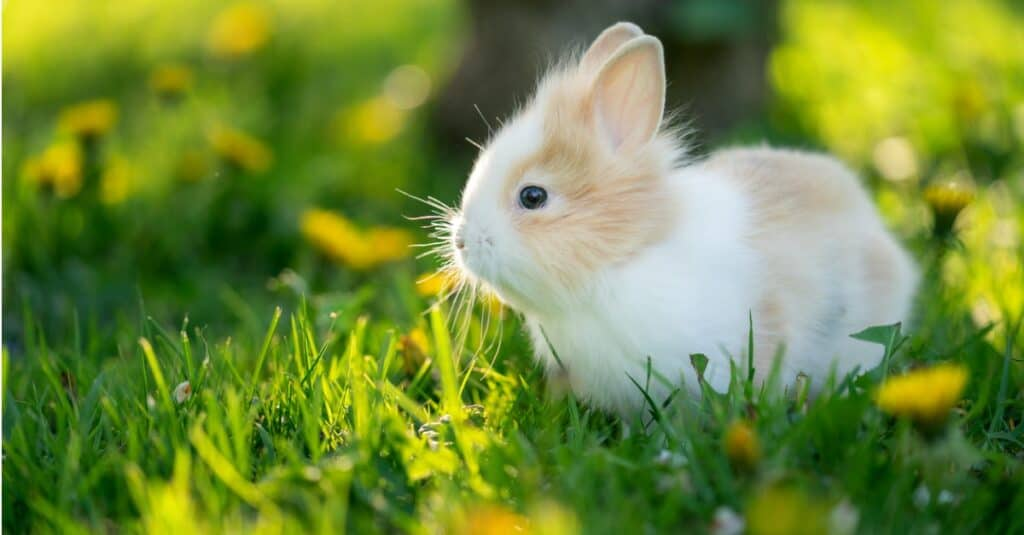

In [4]:
## this is the image path
image_path = '/content/drive/My Drive/Colab Notebooks/CMPS3660-6660/rabbit.jpeg'

image = cv2.imread(image_path)
cv2_imshow(image)

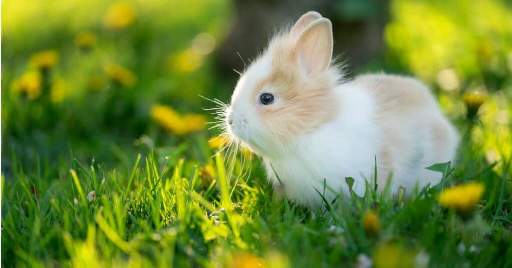

In [5]:
## sub-sampling [guess what it is??]
image_low = image[::2,::2]
cv2_imshow(image_low)

##Step3: Image Contours and Histograms

In [6]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
535
1024
3


### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

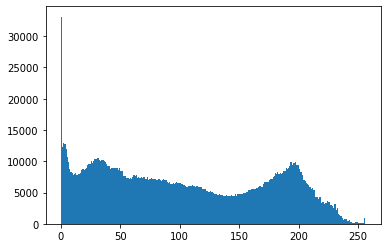

In [7]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

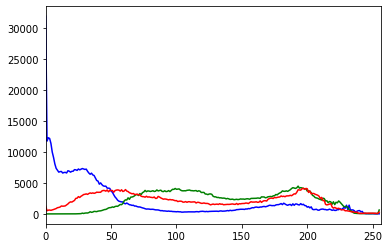

In [8]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

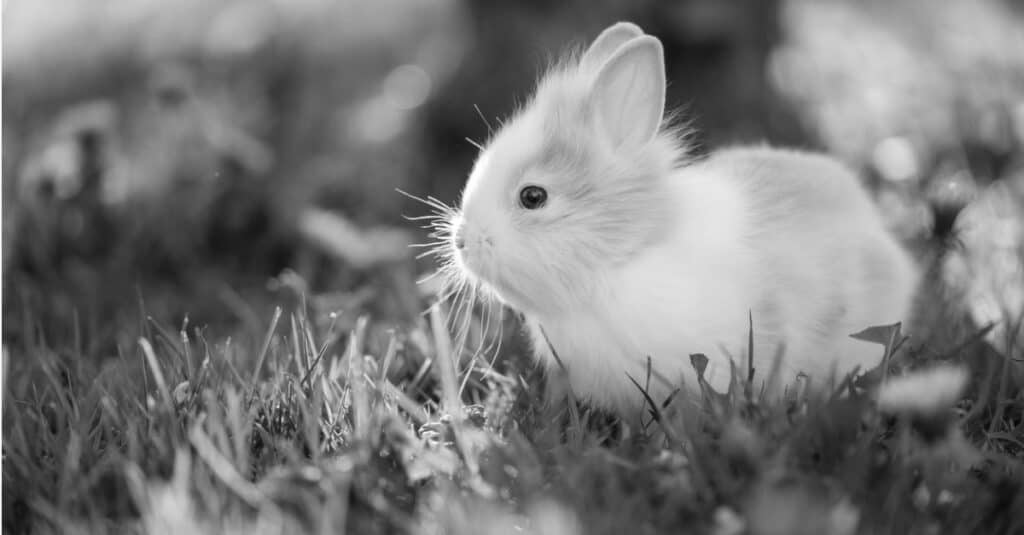

In [9]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

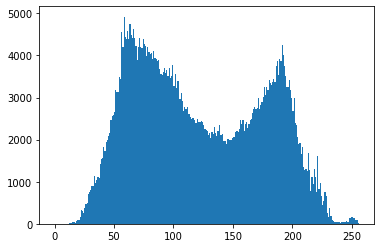

In [10]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()